In [ ]:
!pip install seaborn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import string


In [1]:
from google.colab import files
uploaded = files.upload()

Saving Fake.csv to Fake.csv


In [2]:
from google.colab import files
uploaded = files.upload()

Saving True.csv to True.csv


In [3]:
import pandas as pd

df_fake = pd.read_csv('Fake.csv')    # or the exact file you uploaded, such as 'Fake (1).csv'
df_real = pd.read_csv('True.csv')    # or 'True (1).csv'

df_fake['label'] = 0
df_real['label'] = 1

df = pd.concat([df_fake, df_real])
df = df.sample(frac=1).reset_index(drop=True)


In [5]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))

def clean_text(text):
    # Convert to lowercase
    text = str(text).lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize and remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop]
    # Join back into a cleaned string
    return ' '.join(words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
df['text_clean'] = df['text'].apply(clean_text)


In [7]:

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['text_clean'])
y = df['label']  # 0 for fake, 1 for real


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9884187082405346
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4712
           1       0.99      0.99      0.99      4268

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



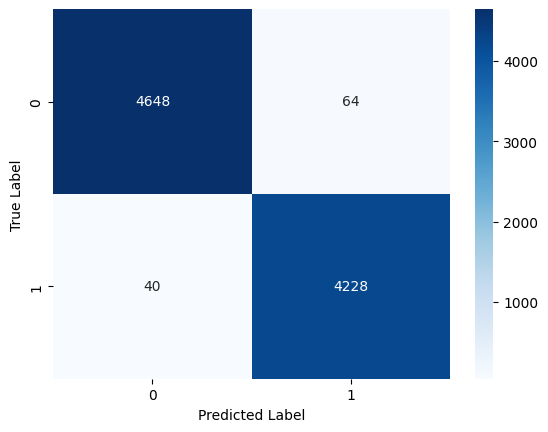

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [13]:
!pip install streamlit


In [14]:
import streamlit as st
# Use trained model to predict user input


In [15]:
import pickle

# Save model
with open('fake_news_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)


In [16]:
from google.colab import files
files.download('fake_news_model.pkl')
files.download('tfidf_vectorizer.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
import streamlit as st
import pickle

# Load model and vectorizer
with open('fake_news_model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('tfidf_vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

st.title("Fake News Detector")

user_input = st.text_area("Paste a news article (or headline):")

if st.button("Check if Fake or Real"):
    if user_input.strip() == "":
        st.warning("Please enter text to test.")
    else:
        # Clean text similar to your Colab clean_text function (optional: keep it simple here)
        import string
        from nltk.corpus import stopwords
        import nltk
        nltk.download('stopwords', quiet=True)
        stop = set(stopwords.words('english'))

        def clean_text(text):
            text = str(text).lower()
            text = text.translate(str.maketrans('', '', string.punctuation))
            words = text.split()
            words = [word for word in words if word not in stop]
            return ' '.join(words)

        cleaned = clean_text(user_input)
        features = vectorizer.transform([cleaned])
        prediction = model.predict(features)[0]
        label = "REAL News" if prediction == 1 else "FAKE News"
        st.success(f"Prediction: {label}")


2025-07-28 09:19:04.826 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 09:19:05.265 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-28 09:19:05.266 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 09:19:05.270 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 09:19:05.273 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 09:19:05.274 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 09:19:05.277 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 09:19:05.279 Thread 'MainThread': mi

In [20]:
!streamlit run app.py


Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


To run a shell command in a code cell, you need to prefix it with `!`. However, running Streamlit directly in Colab might not work as expected. You might need to use a service like `ngrok` to expose the app.

In [19]:
# This command still might not work as expected in Colab without additional setup.
# !streamlit run app.py